# Analyzing newsletter urls

---

In [1]:
%matplotlib inline

# Imports

import re
import os
import json
import pprint
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Variables

pp = pprint.PrettyPrinter(indent=4)

# Read data

data = []
with open('./emails.json') as input_file:
    for line in input_file:
        data.append(json.loads(line))

In [2]:
df = pd.DataFrame(data)

In [3]:
df.shape

(365, 5)

In [4]:
df.head(3)

,date,from,subject,to,urls
0,"Mon, 18 Jan 2016 19:01:07 +0100",Laia Izquierdo <lizquierdo@bluecap.com>,Hola,bluecapglobal@bluecap.com,NaN
1,"Mon, 14 Mar 2016 11:01:06 +0100",Laia Izquierdo <lizquierdo@bluecap.com>,Bluecap banking breakfast,bluecapglobal@bluecap.com,[http://www.bbvagmr.com/wp-content/plugins/mis...
2,"Tue, 15 Mar 2016 09:27:09 +0100",Laia Izquierdo <lizquierdo@bluecap.com>,Bluecap banking breakfast,bluecapglobal@bluecap.com,NaN


In [5]:
df.groupby('subject').size().sort_values(0, ascending=False).reset_index().rename(columns={0:"count"}).head(5)

,subject,count
0,Bluecap Banking Breakfast,305
1,Bluecap banking breakfast,33
2,Bluecap Banking Brunch,10
3,Bluecap Banking Lunch,2
4,Bluecap Banking Breakfast + Benchmark de moros...,1


# Urls

* Focus only on urls
* Determine the newspaper source

In [6]:
# Extract all article urls

urls = []

for idx, row in df.iterrows():
    if row['urls']:
        try:
            for url in row['urls']:
                urls.append(url)
        except:
            print idx, row['urls']
            pass

0 nan
2 nan
7 nan
8 nan
138 nan


In [7]:
# Delete possible dups
urls = list(set(urls))

In [8]:
df_urls = pd.DataFrame(urls).rename(columns={0:"url"})
df_urls.head(5)

,url
0,http://www.elconfidencial.com/empresas/2017-03...
1,http://www.expansion.com/empresas/banca/2017/0...
2,http://www.expansion.com/empresas/banca/2017/1...
3,http://www.expansion.com/empresas/banca/2016/0...
4,http://www.expansion.com/empresas/tecnologia/2...


In [9]:
df_urls['source'] = df_urls['url'].apply(lambda x: re.findall('(?:\/\/www\.|\/\/)(\w+)\.\w',x))
df_urls.head(5)

,url,source
0,http://www.elconfidencial.com/empresas/2017-03...,[elconfidencial]
1,http://www.expansion.com/empresas/banca/2017/0...,[expansion]
2,http://www.expansion.com/empresas/banca/2017/1...,[expansion]
3,http://www.expansion.com/empresas/banca/2016/0...,[expansion]
4,http://www.expansion.com/empresas/tecnologia/2...,[expansion]


In [10]:
for idx, row in df_urls.iterrows():
    source = row['source']
    try:
        df_urls.loc[idx, 'source'] = source[0]
    except:
        df_urls.loc[idx, 'source'] = ""

In [11]:
source = df_urls.groupby('source').size().sort_values(0, ascending=False).reset_index().rename(columns={0:"count"})
source.head(5)

,source,count
0,expansion,2206
1,cincodias,1111
2,elconfidencial,758
3,bernsteinresearch,71
4,blogs,31


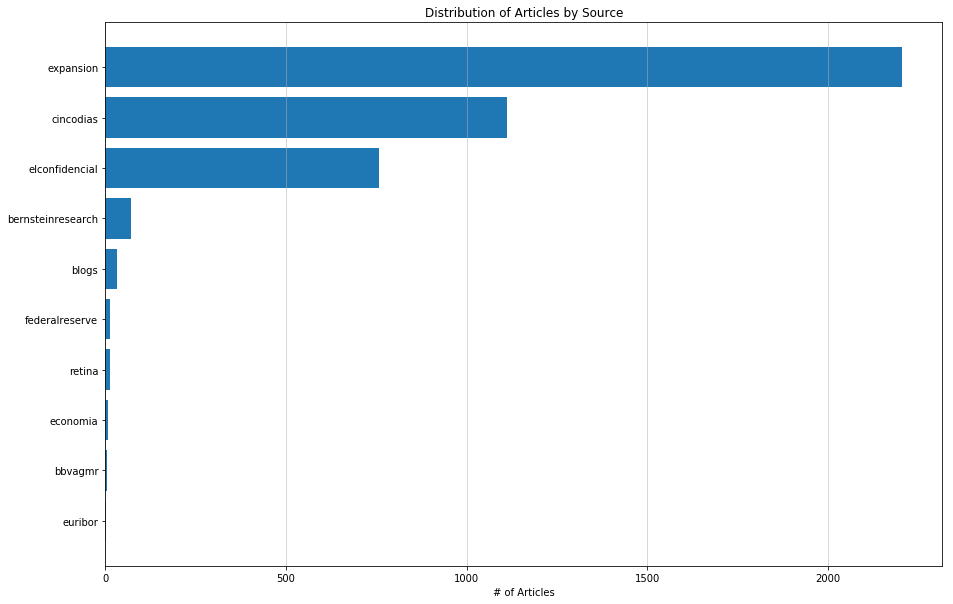

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))

y_pos = np.arange(len(list(source['source'])[:10]))

ax.barh(y_pos, list(source['count'])[:10], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(source['source'])[:10])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# of Articles')
ax.set_title('Distribution of Articles by Source')
ax.xaxis.grid(which='major', linewidth=0.5)

plt.show()